In [53]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230721 entries, 0 to 42537
Data columns (total 50 columns):
id                            5 non-null object
member_id                     0 non-null float64
loan_amnt                     230716 non-null float64
funded_amnt                   230716 non-null float64
funded_amnt_inv               230716 non-null float64
term                          230716 non-null object
int_rate                      230716 non-null object
installment                   230716 non-null float64
grade                         230716 non-null object
sub_grade                     230716 non-null object
emp_title                     216353 non-null object
emp_length                    221717 non-null object
home_ownership                230716 non-null object
annual_inc                    230712 non-null float64
verification_status           230716 non-null object
issue_d                       230716 non-null object
loan_status                   230716 non-null 

In [54]:
#Clustering - DSCAN / KMEAN
#Logistic Regression
#Input Values = State, Income, Purpose, Grade, Term, Home Owndership
#Target - Binary - Defaulted - Not Defaulted
#Target - Multinomial - Performance

#Smaller Input Value variations.....

In [55]:
#Step 1 - create a DF with variables and target default binary.

In [56]:
import numpy as np
df = df.assign(PopGroup=pd.cut(df.annual_inc,bins=[0,50000,100000,200000,np.inf],labels=['<$50K','$50K-$100K','$100K-$200K','>$200K']))
#create income PopGroup

In [57]:
df.groupby('loan_status')['term'].count()

loan_status
Charged Off                                             34726
Current                                                  7955
Default                                                     3
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             184697
In Grace Period                                           233
Late (16-30 days)                                          58
Late (31-120 days)                                        295
Name: term, dtype: int64

In [58]:
df['target'] = np.where(df['loan_status']=='Charged Off', 0, 1)
#create target based on loan_status. 0 is Charged Off else 1

In [59]:
dfM = df[['grade','home_ownership','addr_state','term','PopGroup','loan_status','target','purpose']]
dfM.head()

,grade,home_ownership,addr_state,term,PopGroup,loan_status,target,purpose
0,A,MORTGAGE,FL,36 months,$50K-$100K,Fully Paid,1,debt_consolidation
1,B,MORTGAGE,MI,36 months,$50K-$100K,Fully Paid,1,credit_card
2,B,RENT,NM,36 months,<$50K,Fully Paid,1,debt_consolidation
3,B,RENT,NC,36 months,$50K-$100K,Fully Paid,1,debt_consolidation
4,B,MORTGAGE,CO,36 months,$100K-$200K,Fully Paid,1,debt_consolidation


In [60]:
#test data for null records
dfM.isnull().sum()
#small number of null records indicate data is ok

grade             5
home_ownership    5
addr_state        5
term              5
PopGroup          9
loan_status       5
target            0
purpose           5
dtype: int64

In [61]:
#drop null records
dfM.dropna(inplace=True)

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
dfM.isnull().sum()

grade             0
home_ownership    0
addr_state        0
term              0
PopGroup          0
loan_status       0
target            0
purpose           0
dtype: int64

In [63]:
dfM = dfM[dfM.home_ownership != 'OTHER']
dfM = dfM[dfM.home_ownership != 'NONE']
dfM = dfM[dfM.home_ownership != 'ANY']

In [64]:
dfM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230484 entries, 0 to 42535
Data columns (total 8 columns):
grade             230484 non-null object
home_ownership    230484 non-null object
addr_state        230484 non-null object
term              230484 non-null object
PopGroup          230484 non-null category
loan_status       230484 non-null object
target            230484 non-null int64
purpose           230484 non-null object
dtypes: category(1), int64(1), object(6)
memory usage: 14.3+ MB


In [65]:
purpose = pd.get_dummies(dfM['purpose'])
purpose = purpose.drop(columns=['educational'])
purpose.head()

,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0


In [66]:
home = pd.get_dummies(dfM['home_ownership'])
home.head()

,MORTGAGE,OWN,RENT
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [67]:
state = pd.get_dummies(dfM['addr_state'],drop_first=False)
state =state.drop(columns=['NE'])
state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
term = pd.get_dummies(dfM['term'],drop_first=False)
term.head()

,36 months,60 months
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [69]:
income = pd.get_dummies(dfM['PopGroup'],drop_first=False)
income.head()

,<$50K,$50K-$100K,$100K-$200K,>$200K
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [70]:
grade = pd.get_dummies(dfM['grade'],drop_first=False)
grade.head()

,A,B,C,D,E,F,G
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [71]:
dfM['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [72]:
target = pd.get_dummies(dfM['target'],drop_first=False)
target = target.iloc[:,1:2]
target.head()

,1
0,1
1,1
2,1
3,1
4,1


In [73]:
dfMfinal = pd.concat([dfM['target'],home,term,income,purpose],axis=1)
dfMfinal.head()

,target,MORTGAGE,OWN,RENT,36 months,60 months,<$50K,$50K-$100K,$100K-$200K,>$200K,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.utils import resample

df_majority = dfMfinal[dfMfinal.target==1]
df_minority = dfMfinal[dfMfinal.target==0]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.target.value_counts()

1    34692
0    34692
Name: target, dtype: int64

In [75]:
len(df_majority)

195792

In [76]:
dfMfinal = df_downsampled

In [77]:
#dfMfinal DOWNSAMPLE

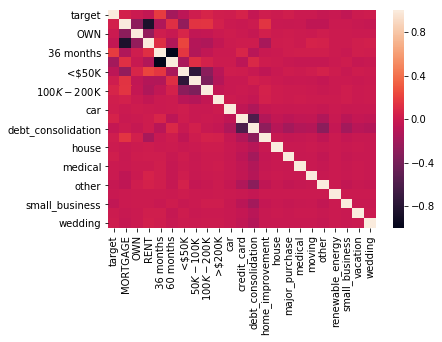

In [78]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(dfMfinal.corr()) 
plt.show()

In [79]:
X = dfMfinal.iloc[:,1:].values
y = dfMfinal.iloc[:,0].values

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.599850109535


In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [82]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.5961028437


In [83]:
df=pd.DataFrame(clf.predict(X))
df.groupby(0)[0].count()
#the model is only predicting 10 defaults

0
0    30627
1    38757
Name: 0, dtype: int64

In [84]:
dfMfinal.groupby('target')['target'].count()

target
0    34692
1    34692
Name: target, dtype: int64

In [85]:
pd.DataFrame(clf.predict_proba(X)).head()

,0,1
0,0.442433,0.557567
1,0.321898,0.678102
2,0.363902,0.636098
3,0.442433,0.557567
4,0.477723,0.522277


In [86]:
df2=pd.DataFrame(clf.predict_proba(X))

In [87]:
filter=df2[0]>.2

In [88]:
df2[filter].groupby(0)[0].count().sum()

69384

In [89]:
#Remove loans with default probabilities greater than 20%. Test this strategy on new data.
#Test this strategy on grade F and G
#Hypothesis - machine learning model will outperform. F and G will outperform.
#apply model to 2015 data
#how would a portfolio of loans selected by the model have performed against the overall portfolio?
#match prob table created with X with performance. Then filter by default probability less than 20%.

In [90]:
#stats on maching learning filter

In [91]:
#pull in 2015 data
#IMPORT DATA
%config IPCompleter.greedy=True 
import pandas as pd
import numpy as np
file = '/Users/ryanpurcell/Desktop/LoanStats3c.csv'
df2015 = pd.read_csv(file,usecols=[*range(0,50)],encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
print(df2015.head())

    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    10400.0      10400.0          10400.0   36 months   
1  NaN        NaN    15000.0      15000.0          15000.0   60 months   
2  NaN        NaN     9600.0       9600.0           9600.0   36 months   
3  NaN        NaN    12800.0      12800.0          12800.0   60 months   
4  NaN        NaN    21425.0      21425.0          21425.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0    6.99%       321.08     A        A3            ...               
1   12.39%       336.64     C        C1            ...               
2   13.66%       326.53     C        C3            ...               
3   17.14%       319.08     D        D4            ...               
4   15.59%       516.36     D        D1            ...               

  total_rec_prncp total_rec_int total_rec_late_fee  recoveries  \
0         5217.75        872.67                0.0      521.27   
1 

In [92]:
import numpy as np
df2015 = df2015.assign(PopGroup=pd.cut(df2015.annual_inc,bins=[0,50000,100000,200000,np.inf],labels=['<$50K','$50K-$100K','$100K-$200K','>$200K']))
#create income PopGroup

In [93]:
df2015.groupby('loan_status')['term'].count()

loan_status
Charged Off            37670
Current                28741
Default                    8
Fully Paid            166573
In Grace Period          833
Late (16-30 days)        263
Late (31-120 days)      1541
Name: term, dtype: int64

In [94]:
df2015['performance']=df2015['total_pymnt']/df2015['funded_amnt']-1

In [95]:
df2015['target'] = np.where(df2015['loan_status']=='Charged Off', 0, 1)

In [96]:
dfM2015 = df2015[['grade','home_ownership','addr_state','term','PopGroup','loan_status','target','performance','purpose']]
dfM2015.head()

,grade,home_ownership,addr_state,term,PopGroup,loan_status,target,performance,purpose
0,A,MORTGAGE,CA,36 months,$50K-$100K,Charged Off,0,-0.364261,credit_card
1,C,RENT,VA,60 months,$50K-$100K,Fully Paid,1,0.159491,debt_consolidation
2,C,RENT,NJ,36 months,$50K-$100K,Fully Paid,1,0.038899,debt_consolidation
3,D,MORTGAGE,CA,60 months,$100K-$200K,Current,1,-0.149329,car
4,D,RENT,MO,60 months,$50K-$100K,Fully Paid,1,0.190768,credit_card


In [97]:
#test data for null records
dfM2015.isnull().sum()
#small number of null records indicate data is ok

grade             2
home_ownership    2
addr_state        2
term              2
PopGroup          2
loan_status       2
target            0
performance       2
purpose           2
dtype: int64

In [98]:
dfM2015.dropna(inplace=True)

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
dfM2015.isnull().sum()

grade             0
home_ownership    0
addr_state        0
term              0
PopGroup          0
loan_status       0
target            0
performance       0
purpose           0
dtype: int64

In [100]:
dfM2015 = dfM2015[dfM2015.home_ownership != 'OTHER']
dfM2015 = dfM2015[dfM2015.home_ownership != 'NONE']
dfM2015 = dfM2015[dfM2015.home_ownership != 'ANY']

In [101]:
dfM2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235628 entries, 0 to 235628
Data columns (total 9 columns):
grade             235628 non-null object
home_ownership    235628 non-null object
addr_state        235628 non-null object
term              235628 non-null object
PopGroup          235628 non-null category
loan_status       235628 non-null object
target            235628 non-null int64
performance       235628 non-null float64
purpose           235628 non-null object
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 16.4+ MB


In [102]:
purpose2015 = pd.get_dummies(dfM2015['purpose'])
purpose2015.head()

,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0


In [103]:
home2015 = pd.get_dummies(dfM2015['home_ownership'])
home2015.head()

,MORTGAGE,OWN,RENT
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [104]:
state2015 = pd.get_dummies(dfM2015['addr_state'],drop_first=False)
state2015 = state2015
state2015.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
term2015 = pd.get_dummies(dfM2015['term'],drop_first=False)
term2015.head()

,36 months,60 months
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [106]:
income2015 = pd.get_dummies(dfM2015['PopGroup'],drop_first=False)
income2015.head()

,<$50K,$50K-$100K,$100K-$200K,>$200K
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [107]:
grade2015 = pd.get_dummies(dfM2015['grade'],drop_first=False)
grade2015.head()

,A,B,C,D,E,F,G
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [108]:
dfM2015['target'].head()

0    0
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [109]:
target2015 = pd.get_dummies(dfM2015['target'],drop_first=False)
target2015 = target2015.iloc[:,1:2]
target2015.head()

,1
0,0
1,1
2,1
3,1
4,1


In [110]:
dfMfinal2015 = pd.concat([dfM2015['target'],dfM2015['performance'],home2015,term2015,income2015,purpose2015],axis=1)
dfMfinal2015.head()

,target,performance,MORTGAGE,OWN,RENT,36 months,60 months,<$50K,$50K-$100K,$100K-$200K,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,-0.364261,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.159491,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.038899,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-0.149329,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.190768,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X2015 = dfMfinal2015.iloc[:,2:]

In [112]:
X2015=X2015.dropna().values

In [113]:
FINAL2015 = pd.DataFrame(clf.predict_proba(X2015))
FINAL2015.head()

,0,1
0,0.353079,0.646921
1,0.665080,0.334920
2,0.442433,0.557567
3,0.454060,0.545940
4,0.622076,0.377924


In [114]:
FINAL2015DF = pd.concat([FINAL2015,dfMfinal2015['target'],dfMfinal2015['performance']],axis=1)
FINAL2015DF=FINAL2015DF.dropna()
FINAL2015DF.head()

,0,1,target,performance
0,0.353079,0.646921,0.0,-0.364261
1,0.665080,0.334920,1.0,0.159491
2,0.442433,0.557567,1.0,0.038899
3,0.454060,0.545940,1.0,-0.149329
4,0.622076,0.377924,1.0,0.190768


In [115]:
FINAL2015DF['performance'].mean()

0.05624612849499671

In [128]:
COFILTER = FINAL2015DF[1]>.7
FINAL2015DF[COFILTER]['performance'].mean()

0.08318947495171708

In [117]:
#Comparing colums of 2 dataframes
#X2015.columns
purpose.columns.difference(purpose2015.columns)
purpose.columns

Index(['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [118]:
FINAL2015DF.count()

0              235627
1              235627
target         235627
performance    235627
dtype: int64

In [129]:
FINAL2015DF[COFILTER].count()

0              7387
1              7387
target         7387
performance    7387
dtype: int64

In [120]:
import scipy.stats as st
st.ttest_ind(FINAL2015DF[COFILTER]['performance'],FINAL2015DF['performance'])

Ttest_indResult(statistic=20.656134208066096, pvalue=9.7128411391886103e-95)

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


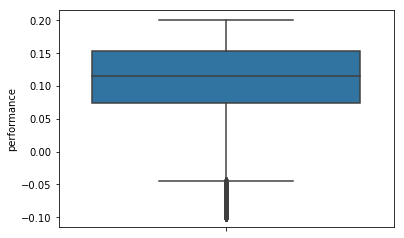

In [121]:
data1 = FINAL2015DF[COFILTER]
perffilter=(data1['performance']>-.1) & (data1['performance']<.2)
data=data1[perffilter]

import seaborn as sns
sns.boxplot(y='performance',data=data)
plt.show()

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


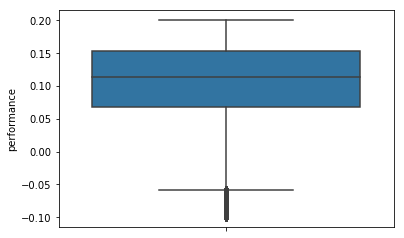

In [122]:
import seaborn as sns
data2 = FINAL2015DF
perffilter=(data2['performance']>-.1) & (data2['performance']<.2)
data2=data2[perffilter]


sns.boxplot(y='performance',data=data2)
plt.show()